In [1]:
import numpy as np
import h5py as h5py
import sympy as sy
import matplotlib.pyplot as plt
import simtk.openmm as mm
import simtk.unit as unit
import simtk.openmm.app as app
from tqdm import tqdm

In [2]:
plt.rcParams['figure.figsize'] = 8, 8

# Elliptical Gaussian Kernel 1D

In [3]:
def elliptical_gaussian_kernel_1D(x,xo,A=-1.0,cxx=0.0):
    inc_x = x-xo
    B = cxx*inc_x*inc_x
    return A*np.exp(-B)

In [6]:
A   = -1
xo  = 0.0
cxx = 1.0

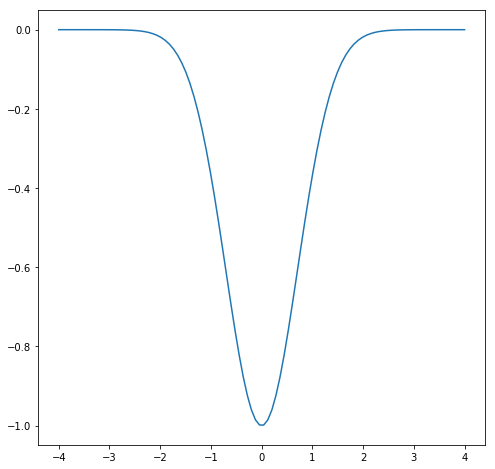

In [7]:
xlim = [-4,4]
xbins = 100

x = np.linspace(xlim[0], xlim[1], xbins)

y = elliptical_gaussian_kernel_1D(x,xo,A,cxx)

plt.plot(x,y)

plt.show()

In [8]:
x = sy.symbols('x')
f = A*sy.exp(-(cxx*(x-xo)**2))
gradient = sy.diff(f,x)
hessian  = sy.diff(gradient,x)

In [9]:
M = hessian.subs(x,xo)

In [13]:
effective_k = M

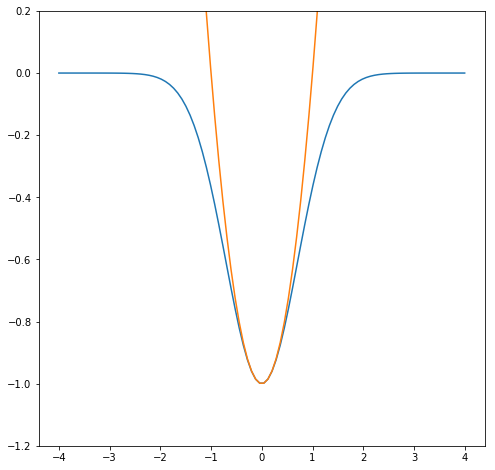

In [19]:
xlim = [-4,4]
xbins = 100

x  = np.linspace(xlim[0], xlim[1], xbins)
y  = elliptical_gaussian_kernel_1D(x,xo,A,cxx)
y2 = 0.5*effective_k*x**2+A
plt.plot(x,y)
plt.plot(x,y2)
plt.ylim([-1.2,0.2])
plt.show()

# Elliptical Gaussian Kernel 2D

In [20]:
def elliptical_gaussian_kernel_2D(x,y,xo,yo,A=-1.0,cxx=0.0,cxy=0.0,cyy=0.0):
    inc_x = x-xo
    inc_y = y-yo
    B = cxx*inc_x*inc_x + 2*cxy*inc_x*inc_y + cyy*inc_y*inc_y
    return A*np.exp(-B)

In [80]:
xo, yo = [0.0,0.0]
A   = -1.0
cxx = 0.5
cxy = 0.5
cyy = 2.0

In [81]:
# Debe ser positiva
M = np.array([[cxx, cxy],[cxy, cyy]])
np.all(np.linalg.eigvals(M+M.transpose()) > 0)

True

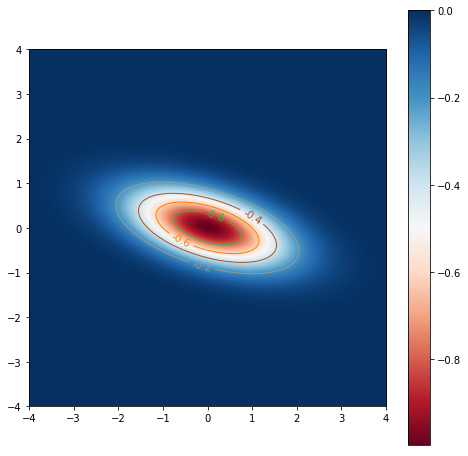

In [82]:
xlim = [-4,4]
ylim = [-4,4]
xbins = 100
ybins = 100

x = np.linspace(xlim[0], xlim[1], xbins)
y = np.linspace(ylim[0], ylim[1], ybins)

X,Y = np.meshgrid(x, y)
Z = elliptical_gaussian_kernel_2D(X,Y,xo,yo,A,cxx,cxy,cyy)

extent = [xlim[0], xlim[1], ylim[0], ylim[1]]
im = plt.imshow(Z, extent=extent, origin='lower',
                cmap=plt.cm.RdBu, interpolation='gaussian')

cset = plt.contour(Z, np.arange(A,0,0.2), extent=extent, origin='lower',
                   linewidths=1, cmap=plt.cm.Set1)

plt.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
plt.colorbar(im, alpha=0.5)

plt.show()

In [24]:
x = sy.symbols('x')
y = sy.symbols('y')
f = A*sy.exp(-(cxx*(x-xo)**2 + 2*cxy*(x-xo)*(y-yo) + cyy*(y-yo)*(y-yo)))
gradient = sy.derive_by_array(f,(x,y))
hessian = sy.derive_by_array(gradient,(x,y))

In [45]:
M = hessian.subs(x,xo).subs(y,yo)
M = np.array(M.tolist(),dtype=float)

In [46]:
eigenvals, eigenvecs = np.linalg.eig(np.array(M))

In [47]:
print('Autovalores:',eigenvals)
print('Autovectores:',eigenvecs)
print('')

for ii in range(eigenvals.shape[0]):
    print('Autovalor y Autovector ',str(ii),':')
    print('')
    print('\t',eigenvals[ii],eigenvecs[:,ii])
    print('')

Autovalores: [2. 2.]
Autovectores: [[1. 0.]
 [0. 1.]]

Autovalor y Autovector  0 :

	 2.0 [1. 0.]

Autovalor y Autovector  1 :

	 2.0 [0. 1.]



# Elliptical Gaussian Kernel 3D

In [49]:
def elliptical_gaussian_kernel_3D(x,y,z,xo,yo,zo,A=-1.0,cxx=0.0,cxy=0.0,cxz=0.0,
                                  cyy=0.0,cyz=0.0,czz=0.0):
    inc_x = x-xo
    inc_y = y-yo
    inc_z = z-zo
    B = cxx*inc_x*inc_x + cyy*inc_y*inc_y + czz*inc_z*inc_z + \
        2*cxy*inc_x*inc_y + 2*cxz*inc_x*inc_z + 2*cyz*inc_y*inc_z
    return A*np.exp(-B)

In [56]:
xo, yo, zo = [0.0,0.0,0.0]
A   = -1.0
cxx = 1.0
cxy = 0.0
cxz = 0.0
cyy = 1.0
cyz = 0.0
czz = 1.0

In [57]:
# Debe ser positiva
M = np.array([[cxx, cxy, cxz], [cxy, cyy, cyz], [cxz, cyz, czz]])
np.all(np.linalg.eigvals(M+M.transpose()) > 0)

True

In [58]:
# plot 3d

In [64]:
x = sy.symbols('x')
y = sy.symbols('y')
z = sy.symbols('z')
f = A*sy.exp(-(cxx*(x-xo)**2 + 2*cxy*(x-xo)*(y-yo) + 2*cxz*(x-xo)*(z-zo) + cyy*(y-yo)*(y-yo) + 2*cyz*(y-yo)*(z-zo) + czz*(z-zo)**2 ))
gradient = sy.derive_by_array(f,(x,y,z))
hessian = sy.derive_by_array(gradient,(x,y,z))

In [65]:
M = hessian.subs(x,xo).subs(y,yo).subs(z,zo)
M = np.array(M.tolist(),dtype=float)

In [66]:
M

array([[2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

In [67]:
eigenvals, eigenvecs = np.linalg.eig(np.array(M))

In [68]:
print('Autovalores:',eigenvals)
print('Autovectores:',eigenvecs)
print('')

for ii in range(eigenvals.shape[0]):
    print('Autovalor y Autovector ',str(ii),':')
    print('')
    print('\t',eigenvals[ii],eigenvecs[:,ii])
    print('')

Autovalores: [2. 2. 2.]
Autovectores: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Autovalor y Autovector  0 :

	 2.0 [1. 0. 0.]

Autovalor y Autovector  1 :

	 2.0 [0. 1. 0.]

Autovalor y Autovector  2 :

	 2.0 [0. 0. 1.]



# Potencial tipo embudo 2D

In [106]:
def check_positive_2d(embudo):
    
    pot_i=0
    for pot in embudo:
        xo, yo, A, cxx, cxy, cyy = pot
        M = np.array([[cxx, cxy],[cxy, cyy]])
        is_positive = np.all(np.linalg.eigvals(M+M.transpose()) > 0)
        if not is_positive:
            print('La gaussiana',pot_i, 'no es definida positiva')
        pot_i+=1

In [107]:
def effective_ks_2D(embudo):
    
    pot_i=0
    for pot in embudo:
        xo, yo, A, cxx, cxy, cyy = pot
        x = sy.symbols('x')
        y = sy.symbols('y')
        f = A*sy.exp(-(cxx*(x-xo)**2 + 2*cxy*(x-xo)*(y-yo) + cyy*(y-yo)**2))
        gradient = sy.derive_by_array(f,(x,y))
        hessian = sy.derive_by_array(gradient,(x,y))
        M = hessian.subs(x,xo).subs(y,yo)
        M = np.array(M.tolist(),dtype=float)
        eigenvals, eigenvecs = np.linalg.eig(np.array(M))
        print('Gaussiana',pot_i)
        for ii in range(eigenvals.shape[0]):
            print('\t effective k',eigenvals[ii],'en modo',eigenvecs[:,ii])
        pot_i+=1
        print('')

In [199]:
def plot_embudo_2D(embudo):
    
    xlim = [-8,8]
    ylim = [-8,8]
    xbins = 100
    ybins = 100

    x = np.linspace(xlim[0], xlim[1], xbins)
    y = np.linspace(ylim[0], ylim[1], ybins)

    X,Y = np.meshgrid(x, y)
    Z = 0.0
    for pot in embudo:
        xo, yo, A, cxx, cxy, cyy = pot
        Z += elliptical_gaussian_kernel_2D(X,Y,xo,yo,A,cxx,cxy,cyy)

    plt.rcParams['figure.figsize'] = 12, 12
    extent = [xlim[0], xlim[1], ylim[0], ylim[1]]
    #im = plt.imshow(Z, extent=extent, origin='lower',
    #                cmap=plt.cm.RdBu, interpolation='gaussian')

    cset = plt.contour(Z, np.arange(-4,0,0.1), extent=extent, origin='lower',
                       linewidths=1, cmap=plt.cm.Set1)

    plt.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
    #plt.colorbar(im, alpha=0.5)

    plt.show()
    
def plot_embudo_surface_2D(embudo):
    
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    xlim = [-8,8]
    ylim = [-8,8]
    xbins = 100
    ybins = 100

    x = np.linspace(xlim[0], xlim[1], xbins)
    y = np.linspace(ylim[0], ylim[1], ybins)

    X,Y = np.meshgrid(x, y)
    Z = 0.0
    for pot in embudo:
        xo, yo, A, cxx, cxy, cyy = pot
        Z += elliptical_gaussian_kernel_2D(X,Y,xo,yo,A,cxx,cxy,cyy)

    plt.rcParams['figure.figsize'] = 12, 12
    extent = [xlim[0], xlim[1], ylim[0], ylim[1]]
    
    ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=False)

    ax.view_init(30, 45)
    
    plt.show()

Gaussiana 0
	 effective k 0.2 en modo [1. 0.]
	 effective k 0.2 en modo [0. 1.]

Gaussiana 1
	 effective k 1.6 en modo [1. 0.]
	 effective k 1.6 en modo [0. 1.]

Gaussiana 2
	 effective k 2.4 en modo [0.70710678 0.70710678]
	 effective k 0.7999999999999998 en modo [-0.70710678  0.70710678]

Gaussiana 3
	 effective k 1.2 en modo [1. 0.]
	 effective k 1.2 en modo [0. 1.]

Gaussiana 4
	 effective k 1.0 en modo [1. 0.]
	 effective k 1.0 en modo [0. 1.]

Gaussiana 5
	 effective k 3.2 en modo [1. 0.]
	 effective k 3.2 en modo [0. 1.]

Gaussiana 6
	 effective k 4.48 en modo [0.70710678 0.70710678]
	 effective k 1.9200000000000002 en modo [-0.70710678  0.70710678]

Gaussiana 7
	 effective k 3.2 en modo [1. 0.]
	 effective k 3.2 en modo [0. 1.]

Gaussiana 8
	 effective k 1.532640224719052 en modo [0.82192562 0.56959484]
	 effective k 0.5073597752809482 en modo [-0.56959484  0.82192562]

Gaussiana 9
	 effective k 3.5200000000000005 en modo [0.70710678 0.70710678]
	 effective k 2.8800000000000003

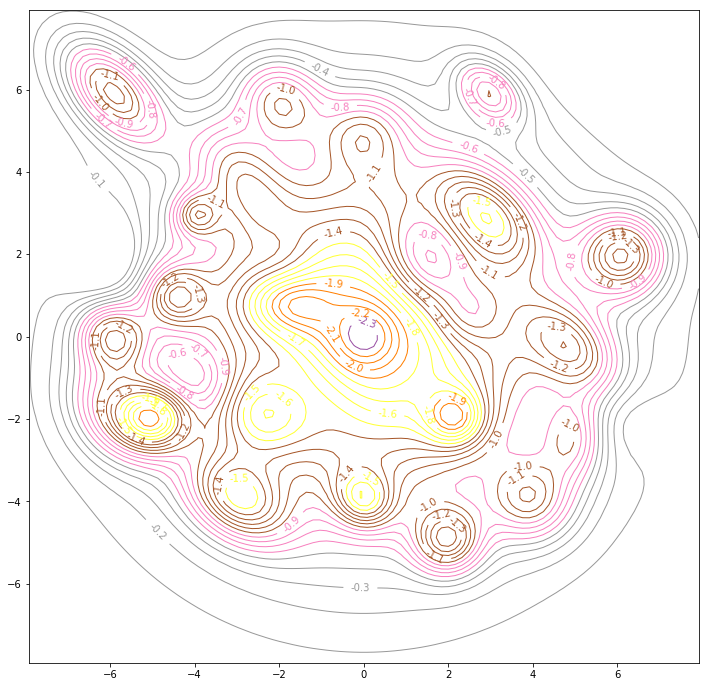

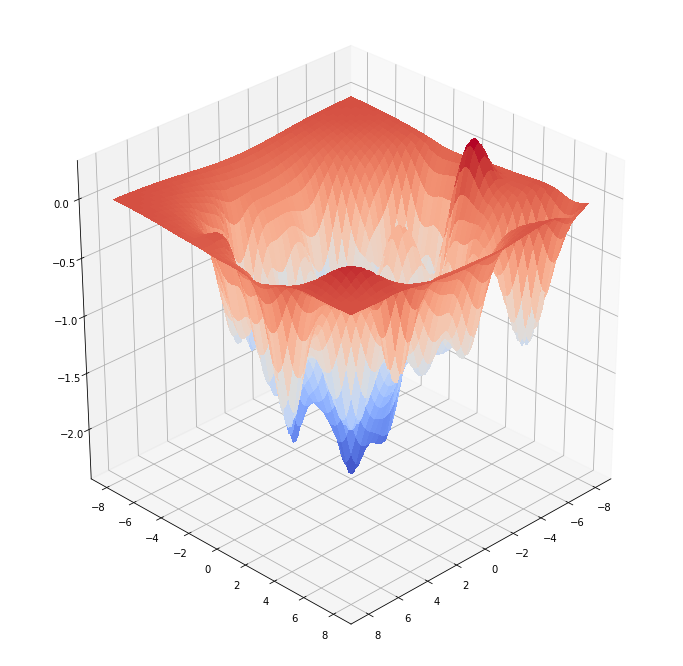

In [200]:
#pot_i = [xo, yo, A, cxx, cxy, cyy]
pot_0 =  [ 0.0,  0.0, -2.0, 0.05, 0.0, 0.05]
pot_1 =  [ 0.0,  0.0, -0.4,  2.0,  0.0, 2.0]
pot_2 =  [ 3.0,  3.0, -0.8,  1.0,  0.5, 1.0]
pot_3 =  [ 0.0,  5.0, -0.6,  1.0,  0.0, 1.0]
pot_4 =  [-2.5, -2.0, -0.5,  1.0,  0.0, 1.0]
pot_5 =  [ 2.2, -2.0, -0.8,  2.0,  0.0, 2.0]
pot_6 =  [ 3.0,  6.0, -0.8,  2.0,  0.8, 2.0]
pot_7 =  [-4.5,  1.0, -0.8,  2.0,  0.0, 2.0]
pot_8 =  [-3.0,  4.0, -0.6,  1.0,  0.4, 0.7]
pot_9 =  [ 0.0, -4.0, -0.8,  2.0,  0.2, 2.0]
pot_10 = [-2.0,  5.8, -0.8,  1.0,  0.1, 1.0]
pot_11 = [-1.8,  0.8, -0.5,  0.9,  0.0, 2.0]
pot_12 = [ 5.0, -0.3, -0.8,  1.0,  0.4, 1.0]
pot_13 = [ 4.0, -4.0, -0.8,  1.0,  0.0, 1.0]
pot_14 = [ 5.0, -2.5, -0.6,  2.0,  0.0, 1.0]
pot_15 = [-3.0, -4.0, -1.0,  0.8,  0.3, 1.0]
pot_16 = [-4.0,  3.0, -0.7,  3.5,  0.0, 3.5]
pot_17 = [-5.0, -2.0, -1.2,  1.5,  0.0, 1.5]
pot_18 = [-6.0, -1.8, -0.8,  1.0,  0.2, 0.8]
pot_19 = [ 2.0, -5.0, -1.0,  1.5,  0.0, 1.5]
pot_20 = [-6.0,  0.0, -1.0,  1.5,  0.1, 1.5]
pot_21 = [-6.0,  6.0, -1.2,  1.0,  0.5, 0.9]
pot_22 = [ 6.2,  2.0, -1.2,  1.0,  0.0, 1.0]

pot_23 = [-2.0,  2.0,  0.2, 1.5, 0.0, 1.5]
pot_24 = [ 1.5,  1.8,  0.8, 1.0, 0.2, 0.8]
pot_25 = [ 2.5,  0.5,  0.4, 1.5, 0.0, 1.5]
pot_26 = [-4.0, -1.0,  0.4, 1.2, 0.1, 1.5]
pot_27 = [-1.5, -1.0,  0.3, 0.7, 0.5, 0.9]
pot_28 = [-6.2,  2.0,  0.5, 1.2, 0.0, 0.8]
pot_29 = [ 6.0,  6.0,  0.2, 0.8, 0.5, 0.9]
pot_30 = [ 6.2, -2.0,  0.2, 1.0, 0.0, 1.0]

embudo = [pot_0, pot_1, pot_2, pot_3, pot_4, pot_5, pot_6, pot_7, pot_8, pot_9, 
         pot_10, pot_11, pot_12, pot_13, pot_14, pot_15, pot_16, pot_17, pot_18,
         pot_19, pot_20, pot_21, pot_22, pot_23, pot_24, pot_25, pot_26, pot_27,
         pot_28, pot_29, pot_30]

check_positive_2d(embudo)
effective_ks_2D(embudo)

plot_embudo_2D(embudo)

plot_embudo_surface_2D(embudo)

# Potencial tipo embudo 3D

In [204]:
def check_positive_3D(embudo):
    
    pot_i=0
    for pot in embudo:
        xo, yo, zo, A, cxx, cxy, cxz, cyy, cyz, czz = pot
        M = np.array([[cxx, cxy, cxz], [cxy, cyy, cyz], [cxz, cyz, czz]])
        is_positive = np.all(np.linalg.eigvals(M+M.transpose()) > 0)
        if not is_positive:
            print('La gaussiana',pot_i, 'no es definida positiva')
        pot_i+=1

In [205]:
def effective_ks_3D(embudo):
    
    pot_i=0
    for pot in embudo:

        xo, yo, zo, A, cxx, cxy, cxz, cyy, cyz, czz = pot
        x = sy.symbols('x')
        y = sy.symbols('y')
        z = sy.symbols('z')
        f = A*sy.exp(-(cxx*(x-xo)**2 + 2*cxy*(x-xo)*(y-yo) + 2*cxz*(x-xo)*(z-zo) + cyy*(y-yo)*(y-yo) + 2*cyz*(y-yo)*(z-zo) + czz*(z-zo)**2 ))
        gradient = sy.derive_by_array(f,(x,y,z))
        hessian = sy.derive_by_array(gradient,(x,y,z))
        M = hessian.subs(x,xo).subs(y,yo).subs(z,zo)
        M = np.array(M.tolist(),dtype=float)
        eigenvals, eigenvecs = np.linalg.eig(np.array(M))
        print('Gaussiana',pot_i)
        for ii in range(eigenvals.shape[0]):
            print('\t effective k',eigenvals[ii],'en modo',eigenvecs[:,ii])
        pot_i+=1
        print('')

In [206]:
#pot_i = [  xo,   yo,  zo,    A,  cxx,  cxy, cxz, cyy, cyz, czz]
pot_0 =  [ 0.0,  0.0, 0.0, -2.0, 0.05,  0.0, 0.0, 0.05, 0.0, 0.05]
pot_1 =  [ 0.0,  0.0, 0.0, -0.4,  2.0,  0.0, 0.0,  2.0, 0.0, 2.0]
pot_2 =  [ 3.0,  3.0, 3.0, -0.8,  1.0,  0.5, 0.2,  1.0, 0.1, 1.0]
pot_3 =  [ 0.0,  5.0, 0.0, -0.6,  1.0,  0.0, 0.0,  1.0, 0.2, 1.2]
pot_4 =  [-2.5, -2.0,-2.0, -0.5,  1.0,  0.0, 0.4,  1.0, 0.0, 1.2]
pot_5 =  [ 2.2, -2.0, 2.0, -0.8,  2.0,  0.0, 0.2,  2.0, 0.4, 0.8]
pot_6 =  [ 3.0,  6.0, 3.0, -0.8,  2.0,  0.8, 0.0,  2.0, 0.2, 2.0]
pot_7 =  [-4.5,  1.0, 2.0, -0.8,  2.0,  0.0, 0.1,  2.0, 0.0, 0.7]
pot_8 =  [-3.0,  4.0, 1.0, -0.6,  1.0,  0.4, 0.0,  0.7, 0.0, 1.0]
pot_9 =  [ 0.0, -4.0, 0.0, -0.8,  2.0,  0.2, 0.2,  2.0, 0.3, 2.0]
pot_10 = [-2.0,  5.8,-3.0, -0.8,  1.0,  0.1, 0.0,  1.0, 0.0, 1.2]
pot_11 = [-1.8,  0.8, 3.0, -0.5,  0.9,  0.0, 0.2,  2.0, 0.2, 1.5]
pot_12 = [ 5.0, -0.3, 5.0, -0.8,  1.0,  0.4, 0.3,  1.0, 0.0, 1.2]
pot_13 = [ 4.0, -4.0, 4.0, -0.8,  1.0,  0.0, 0.0,  1.0, 0.1, 0.7]
pot_14 = [ 5.0, -2.5,-4.0, -0.6,  2.0,  0.0, 0.3,  1.0, 0.0, 0.8]
pot_15 = [-3.0, -4.0,-4.0, -1.0,  0.8,  0.3, 0.0,  1.0, 0.3, 1.0]
pot_16 = [-4.0,  3.0, 4.0, -0.7,  3.5,  0.0, 0.4,  3.5, 0.0, 1.2]
pot_17 = [-5.0, -2.0, 6.0, -1.2,  1.5,  0.0, 0.0,  1.5, 0.2, 0.8]
pot_18 = [-6.0, -1.8,-6.0, -0.8,  1.0,  0.2, 0.1,  0.8, 0.0, 1.0]
pot_19 = [ 2.0, -5.0, 5.0, -1.0,  1.5,  0.0, 0.1,  1.5, 0.1, 1.5]
pot_20 = [-6.0,  0.0, 2.0, -1.0,  1.5,  0.1, 0.0,  1.5, 0.0, 0.9]
pot_21 = [-6.0,  6.0, 1.0, -1.2,  1.0,  0.5, 0.2,  0.9, 0.2, 0.9]
pot_22 = [ 6.2,  2.0, 3.0, -1.2,  1.0,  0.0, 0.0,  1.0, 0.2, 1.0]

pot_23 = [-2.0,  2.0, 0.0,  0.2,  1.5,  0.0, 0.2,  1.5, 0.3, 1.5 ]
pot_24 = [ 1.5,  1.8, 1.0,  0.8,  1.0,  0.2, 0.0,  0.8, 0.0, 1.0 ]
pot_25 = [ 2.5,  0.5, 0.0,  0.4,  1.5,  0.0, 0.1,  1.5, 0.2, 1.5 ]
pot_26 = [-4.0, -1.0, 3.0,  0.4,  1.2,  0.1, 0.0,  1.5, 0.2, 1.2 ]
pot_27 = [-1.5, -1.0, 3.0,  0.3,  0.7,  0.5, 0.1,  0.9, 0.0, 0.9 ]
pot_28 = [-6.2,  2.0,-3.0,  0.5,  1.2,  0.0, 0.3,  0.8, 0.1, 0.8 ]
pot_29 = [ 6.0,  6.0, 3.0,  0.2,  0.8,  0.5, 0.0,  0.9, 0.0, 1.0 ]
pot_30 = [ 6.2, -2.0,-3.0,  0.2,  1.0,  0.0, 0.4,  1.0, 0.2, 1.0 ]

embudo = [pot_0, pot_1, pot_2, pot_3, pot_4, pot_5, pot_6, pot_7, pot_8, pot_9, 
         pot_10, pot_11, pot_12, pot_13, pot_14, pot_15, pot_16, pot_17, pot_18,
         pot_19, pot_20, pot_21, pot_22, pot_23, pot_24, pot_25, pot_26, pot_27,
         pot_28, pot_29, pot_30]

check_positive_3D(embudo)
effective_ks_3D(embudo)

Gaussiana 0
	 effective k 0.2 en modo [1. 0. 0.]
	 effective k 0.2 en modo [0. 1. 0.]
	 effective k 0.2 en modo [0. 0. 1.]

Gaussiana 1
	 effective k 1.6 en modo [1. 0. 0.]
	 effective k 1.6 en modo [0. 1. 0.]
	 effective k 1.6 en modo [0. 0. 1.]

Gaussiana 2
	 effective k 2.525481540639284 en modo [0.67913425 0.64698789 0.34667469]
	 effective k 0.7828400732399166 en modo [ 0.7210091  -0.6765209  -0.14988445]
	 effective k 1.4916783861208005 en modo [-0.13755924 -0.35174727  0.92593267]

Gaussiana 3
	 effective k 1.5883281572999746 en modo [0.         0.52573111 0.85065081]
	 effective k 1.0516718427000251 en modo [ 0.          0.85065081 -0.52573111]
	 effective k 1.2 en modo [1. 0. 0.]

Gaussiana 4
	 effective k 0.6876894374382339 en modo [-0.78820544  0.          0.61541221]
	 effective k 1.512310562561766 en modo [-0.61541221  0.         -0.78820544]
	 effective k 1.0 en modo [0. 1. 0.]

Gaussiana 5
	 effective k 1.0426696362323384 en modo [ 0.1407893   0.2815786  -0.94915323]
	 e